<a href="https://colab.research.google.com/github/NordstromBorup/hello-world/blob/master/ML_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Indlæs træningsdata fra Excel**

In [0]:
import io
import pandas as pd
from google.colab import files

uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['Traindata_udvalgte_uden_VF.xlsx']), index_col=0)

Saving Traindata_udvalgte_uden_VF.xlsx to Traindata_udvalgte_uden_VF.xlsx


In [0]:
#Vi tjekker hvor mange observationer og features vi har i datasættet
N, M = df.shape
print ('Antal observationer:', N)
print ('Antal features:', M)
df.head(5)

Antal observationer: 827
Antal features: 59


,Bruttofortjeneste2012,Bruttofortjeneste2013,Bruttofortjeneste2014,EBITDA2012,EBITDA2013,EBITDA2014,Driftsresultat2012,Driftsresultat2013,Driftsresultat2014,Årets resultat2012,...,Delta2 Soliditetsgrad,Delta1 Score afkastningsgrad,Delta2 Score afkastningsgrad,Delta1 Score soliditetsgrad,Delta2 Score soliditetsgrad,Delta1 Score likviditetsgrad,Delta2 Score likviditetsgrad,Alder_2015,Konkurs,CVR
0,4612429.0,7847550.0,8114496.0,-2135973.0,2235514.0,2044471.0,-2283168.0,2051391.0,1851253.0,-2013937.0,...,0.276062,8,0,0,0,0,0,33,0,89901510
1,-1401419.0,-179744.0,324751.0,-568356.0,-179744.0,324751.0,-985094.0,-179744.0,324751.0,-817069.0,...,3.786758,1,6,0,0,0,0,33,0,89825415
2,3948864.0,3069382.0,3204894.0,361336.0,-71938.0,331285.0,113564.0,-297701.0,43701.0,-30254.0,...,1.565756,-2,2,-2,0,-2,0,36,0,88415817
3,15422125.0,18469346.0,18191083.0,357798.0,1368607.0,833454.0,330918.0,1331096.0,782867.0,69183.0,...,-8.873412,5,-4,2,-2,2,-2,15,0,10035066
4,4188624.0,5071294.0,4272249.0,-162570.0,942866.0,610953.0,-231468.0,903424.0,540352.0,-632699.0,...,1.198162,6,-1,1,0,1,0,15,0,10036356


In [0]:
df.keys()

Index(['Bruttofortjeneste2012', 'Bruttofortjeneste2013',
       'Bruttofortjeneste2014', 'EBITDA2012', 'EBITDA2013', 'EBITDA2014',
       'Driftsresultat2012', 'Driftsresultat2013', 'Driftsresultat2014',
       'Årets resultat2012', 'Årets resultat2013', 'Årets resultat2014',
       'Samlede aktiver2012', 'Samlede aktiver2013', 'Samlede aktiver2014',
       'Omsætningsaktiver2012', 'Omsætningsaktiver2013',
       'Omsætningsaktiver2014', 'Egenkapital2012', 'Egenkapital2013',
       'Egenkapital2014', 'Kortfristet gæld2012', 'Kortfristet gæld2013',
       'Kortfristet gæld2014', 'Afkastningsgrad2012', 'Afkastningsgrad2013',
       'Afkastningsgrad2014', 'Likviditetsgrad2012', 'Likviditetsgrad2013',
       'Likviditetsgrad2014', 'Soliditetsgrad2012', 'Soliditetsgrad2013',
       'Soliditetsgrad2014', 'Score afkastningsgrad2012',
       'Score afkastningsgrad2013', 'Score afkastningsgrad2014',
       'Score soliditetsgrad2012', 'Score soliditetsgrad2013',
       'Score soliditetsgrad2014'

In [0]:
#Her gemmer vi data som vi skal bruge senere
y = df['Konkurs'].values

In [0]:
#Her fjerne vi features som ikke bruges
del df['Konkurs']
del df['CVR']
del df['Industrikode']
del df['Postnummer']

In [0]:
#Her gemmer vi vores træningsdata
X = df.values

In [0]:
#Her gemmer vi kolonne navne til senere brug
feature_col_names = df.columns.tolist()

In [0]:
feature_col_names[21]

'Kortfristet gæld2012'

In [0]:
#Vi tester at der er lige mange observationer i X og y.
print (X.shape)
print (y.shape)

(827, 55)
(827,)


In [0]:
# Opdel data i 'training' og 'test'
# Husk, at 'test' data aldrig må bruges til at træne eller optimere modellen!!!
from sklearn import model_selection
test_size = 0.182
seed = 10
X_train0, X_test, Y_train0, Y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)

In [0]:
# Opdel træningsdata i 'train' og 'validation'
validation_size = 0.3
seed = 10
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_train0, Y_train0, test_size=validation_size, random_state=seed, stratify=Y_train0)

In [0]:
#Lad os først se hvor stor en andel de to klasser udgør
N_train, M_train = X_train.shape
y1_train = Y_train.sum()/N_train
print ('Konkurs udgør {0:0.2f} pct. i træningsdata'.format(y1_train*100))
print ('Antal observationer i train', N_train)
print('')
N_validation, M_validation = X_validation.shape
y1_validation = Y_validation.sum()/N_validation
print ('Konkurs udgør {0:0.2f} pct. i validation'.format(y1_validation*100))
print ('Antal observationer i validation', N_validation)
print('')
N_test, M_test = X_test.shape
y1_test = Y_test.sum()/N_test
print ('Konkurs udgør {0:0.2f} pct. i testdata'.format(y1_test*100))
print ('Antal observationer i test', N_test)

Konkurs udgør 26.22 pct. i træningsdata
Antal observationer i train 473

Konkurs udgør 26.11 pct. i validation
Antal observationer i validation 203

Konkurs udgør 26.49 pct. i testdata
Antal observationer i test 151


In [0]:
#Her laver vi den første model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap = True, criterion = 'entropy', class_weight='balanced', max_depth = 6, max_features = 5, 
                       min_samples_leaf = 1, min_samples_split = 2, n_estimators= 15, random_state=10)

In [0]:
#Her predicter vi vha. cross validation
from sklearn.model_selection import cross_val_predict
predictions_rf = cross_val_predict(rf, X_train0, Y_train0, cv=5)

In [0]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(Y_train0, predictions_rf).ravel()
prob_rf = cross_val_predict(rf, X_train0, Y_train0, cv=5, method='predict_proba')

print ('TN:', tn)
print ('FP:', fp)
print ('FN:', fn)
print ('TP:', tp)
print ('Accuracy:', (tn+tp)/(tn+fp+fn+tp))
print ('Recall:', (tp)/(tp+fn))
print ('TNR:', (tn)/(tn+fp))
print ('AUC score:', roc_auc_score(Y_train0, prob_rf[:,1]))

TN: 462
FP: 37
FN: 59
TP: 118
Accuracy: 0.8579881656804734
Recall: 0.6666666666666666
TNR: 0.9258517034068137
AUC score: 0.9118293083341825


In [0]:
#Her træner vi modellen - husk at den endnu ikke er optimeret!!
rf.fit(X_train0, Y_train0)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=6, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=None, oob_score=False, random_state=10,
            verbose=0, warm_start=False)

In [0]:
#Her laver vi en funktion til at vise scores på testsættet
def scores_test(model, X_test, Y_test):
    predictions = model.predict(X_test)
    prob = model.predict_proba(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()
    print ('Number of observations:', len(Y_test))
    print ('TN:', tn)
    print ('FP:', fp)
    print ('FN:', fn)
    print ('TP:', tp)
    print ('Accuracy:', (tn+tp)/(tn+fp+fn+tp))
    print ('Recall:', (tp)/(tp+fn))
    print ('TNR:', (tn)/(tn+fp))
    print ('AUC score:', roc_auc_score(Y_test, prob[:,1]))
    print ('')
    return (tn+tp)/(tn+fp+fn+tp), (tp)/(tp+fn), (tn)/(tn+fp)

In [0]:
scores_test(rf, X_test, Y_test)

Number of observations: 151
TN: 100
FP: 11
FN: 8
TP: 32
Accuracy: 0.8741721854304636
Recall: 0.8
TNR: 0.9009009009009009
AUC score: 0.9144144144144144



(0.8741721854304636, 0.8, 0.9009009009009009)

In [0]:
from sklearn.preprocessing.data import QuantileTransformer
scaler = QuantileTransformer(output_distribution='uniform')
scaler.fit(X_train0)        
X_scaled = scaler.transform(X_train0) 

In [0]:
#Her laver vi en funktion, så vi kan se output af predictions ift. til en udvalgt feature
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show
import matplotlib.pyplot as plt
import numpy as np

def test_scores_graph(model, X_train, Y_train, feature=2):
          
    X_scaled = scaler.transform(X_train) 
    
    prob = model.predict_proba(X_train)
    fig, ax = plt.subplots(figsize=(8,8))
    plt.axis([0, 1, 0, 1])
    plt.xticks(np.arange(0, 1, 0.1))
    plt.xlabel('Probability')
    plt.ylabel(feature_col_names[feature])
    plt.title('Plotting probability')
    x = prob[:,0]

    for color in ['red','blue']:
        if color == 'red':
            class_mask = Y_train==1
            group = 'Konkurs'
        else:
            class_mask = Y_train==0
            group = 'Aktiv'
        ax.scatter(x[class_mask], X_scaled[:,feature][class_mask], c=color, s=20, label=group)

    ax.legend()
    ax.grid(True)

    plt.show()

Lassox testdata:


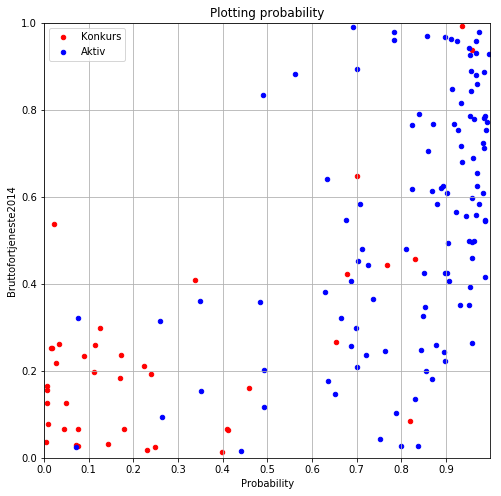

In [0]:
print ('Lassox testdata:')
test_scores_graph(rf, X_test, Y_test, feature=2)

In [0]:
#Her laver vi en funktion til at optimere modellen
scoring_auc = {'AUC': 'roc_auc'}
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_AUC'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_AUC'][candidate],
                  results['std_test_AUC'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [0]:
clf = RandomForestClassifier(class_weight='balanced', random_state=10)

In [0]:
# Model parametre som skal optimeres
n_features = X.shape
param_dist = {"n_estimators": sp_randint(10, 40), 
              "max_depth": [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
              "max_features": sp_randint(1, n_features[1]),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Vi bruger funktionen randomized search - denne er forholdvis hurtig og giver brugbare resultater (Bemærk, at modellen bruger accuracy som default værdi)
n_iter_search = 120
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, scoring=scoring_auc, cv=5, refit='AUC')

start = time()
random_search.fit(X_train0, Y_train0)

print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 114.94 seconds for 120 candidates parameter settings.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.919 (std: 0.034)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 31}

Model with rank: 2
Mean validation score: 0.917 (std: 0.037)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 20}

Model with rank: 3
Mean validation score: 0.916 (std: 0.036)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 34}

Model with rank: 4
Mean validation score: 0.916 (std: 0.038)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 38}

Model with rank: 5
Mean validation score: 0.915 (std: 0.043)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'm

In [0]:
#Gem den optimerede model
rf2 = random_search.best_estimator_
rf2.fit(X_train0, Y_train0)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='entropy', max_depth=6, max_features=1,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            n_estimators=31, n_jobs=None, oob_score=False, random_state=10,
            verbose=0, warm_start=False)

In [0]:
print ('Scores på lassox testdata:')
scores_test(rf2, X_test, Y_test)

Scores på lassox testdata:
Number of observations: 151
TN: 101
FP: 10
FN: 7
TP: 33
Accuracy: 0.8874172185430463
Recall: 0.825
TNR: 0.9099099099099099
AUC score: 0.911036036036036



(0.8874172185430463, 0.825, 0.9099099099099099)

Lassox testdata:


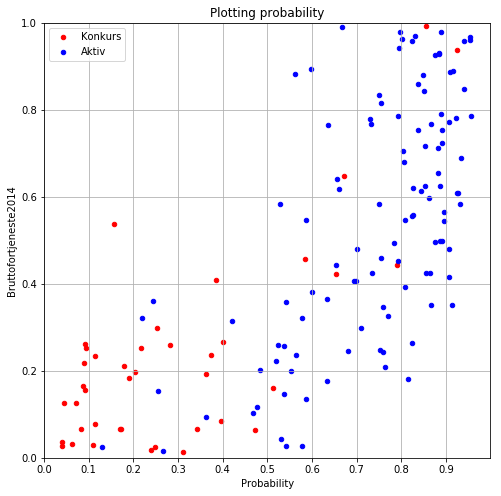

In [0]:
print ('Lassox testdata:')
test_scores_graph(rf2, X_test, Y_test, feature=2)

In [0]:
scaler = QuantileTransformer(output_distribution='uniform')
scaler.fit(X)   

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)

In [0]:
def get_scatter(f0, f1, f2):
  feature0 = f0
  feature1 = f1
  feature2 = f2
  print (feature_col_names[feature2])
     
  X_scaled1 = scaler.transform(X)
  X0 = X_scaled1[:,feature0]
  X1 = X_scaled1[:,feature1]
  X2 = X_scaled1[:,feature2]
  X3 = X2 - X1
  X4 = X2 - X0
  class_mask1 = y==0
  class_mask2 = y==1

  f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18,6))
  ax1.scatter(X1[class_mask1], X2[class_mask1], color='b')
  ax1.scatter(X1[class_mask2], X2[class_mask2], color='r')
  ax1.set_ylabel(feature_col_names[feature2])
  ax1.set_xlabel(feature_col_names[feature1])
  plt.ylabel(feature_col_names[feature2])
  ax1.set_title('Feature 2014 vs. 2013')
  ax2.scatter(X3[class_mask1], X2[class_mask1], color='b')
  ax2.scatter(X3[class_mask2], X2[class_mask2], color='r')
  ax2.set_title('Feature vs. change in feature')
  ax2.set_xlabel('Change in feature from t to t-1')
  ax2.set_ylabel(feature_col_names[feature2])
  ax3.scatter(X4[class_mask1], X2[class_mask1], color='b')
  ax3.scatter(X4[class_mask2], X2[class_mask2], color='r')
  ax3.set_title('Feature vs. change in feature')
  ax3.set_xlabel('Change in feature from t to t-2')

  plt.show()

Bruttofortjeneste2014


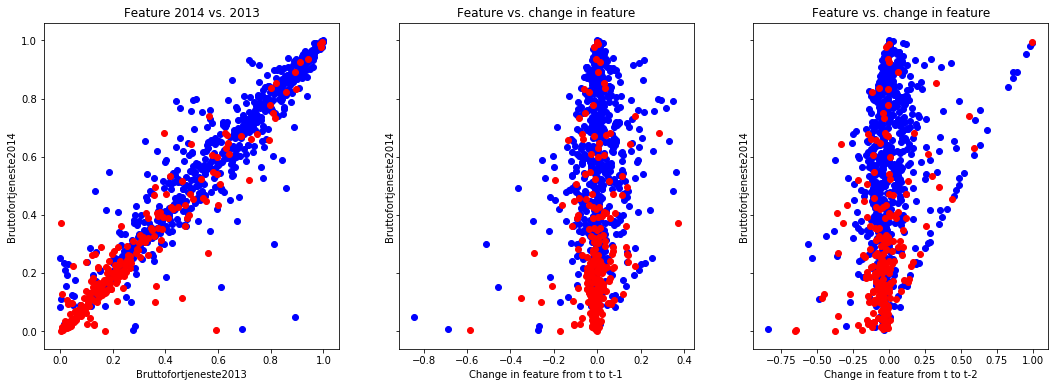

In [0]:
get_scatter(0, 1, 2)

0 1 2
Bruttofortjeneste2014


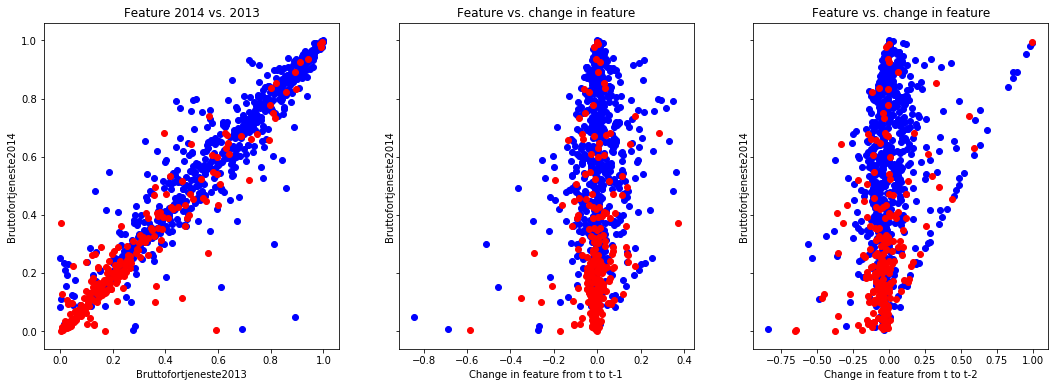

3 4 5
EBITDA2014


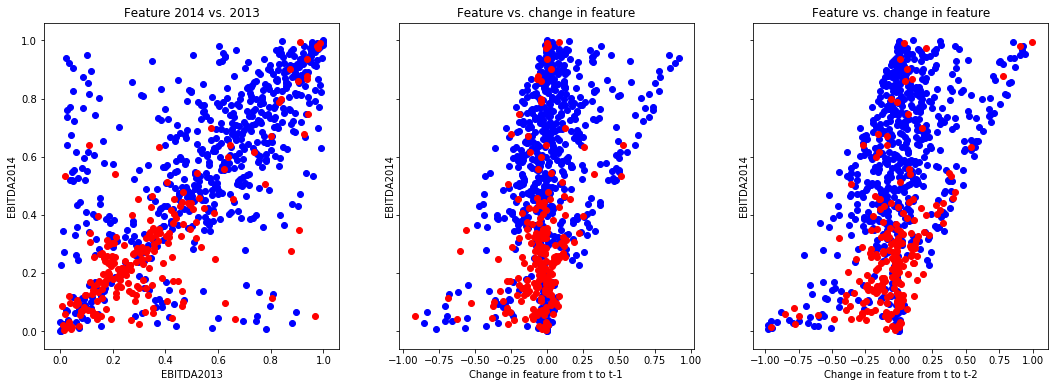

6 7 8
Driftsresultat2014


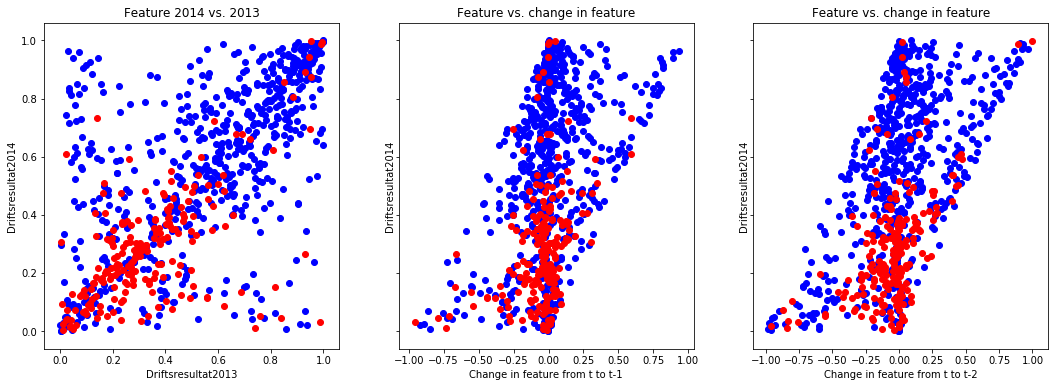

9 10 11
Årets resultat2014


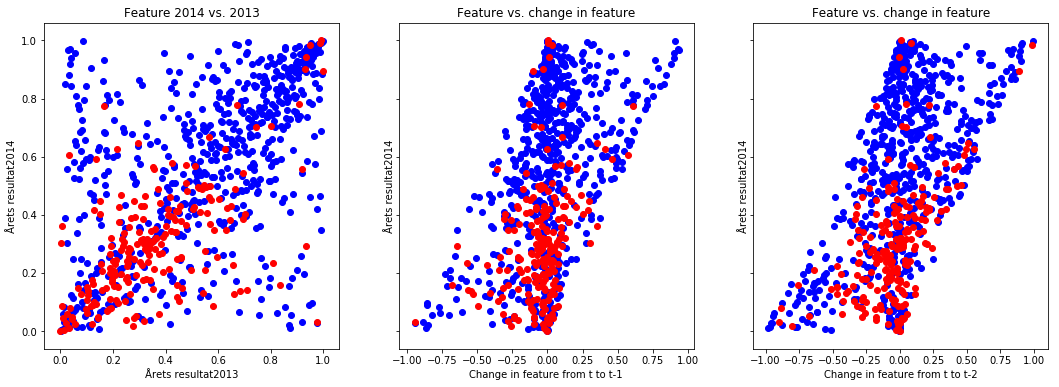

12 13 14
Samlede aktiver2014


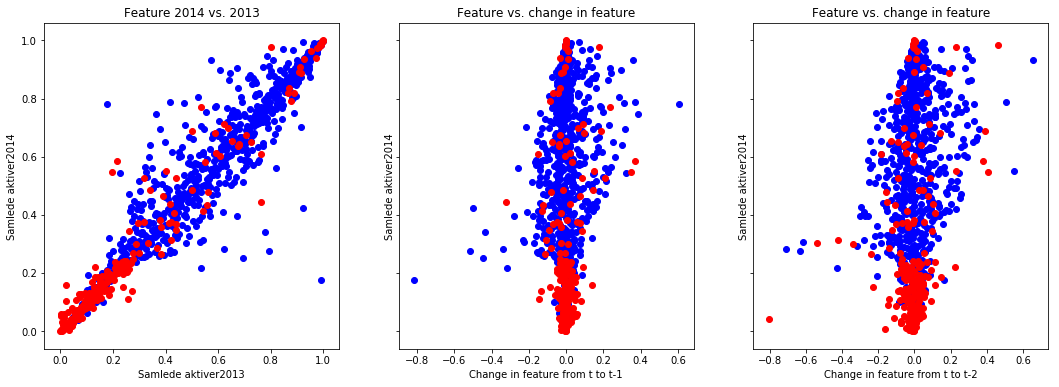

15 16 17
Omsætningsaktiver2014


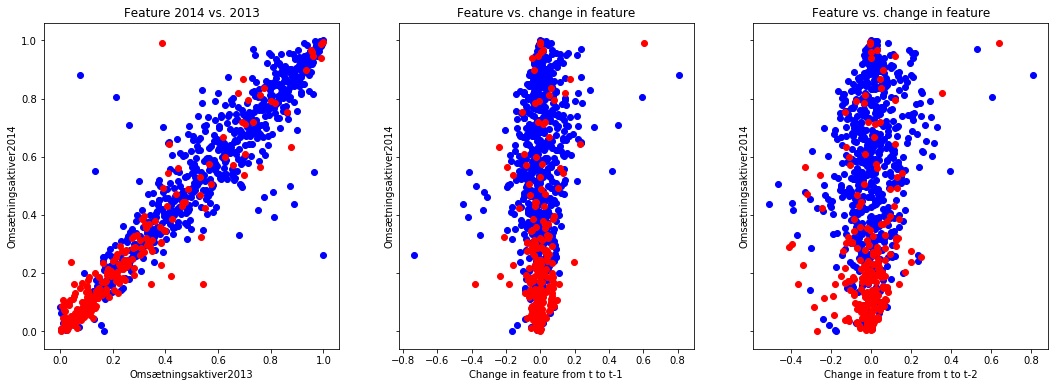

18 19 20
Egenkapital2014


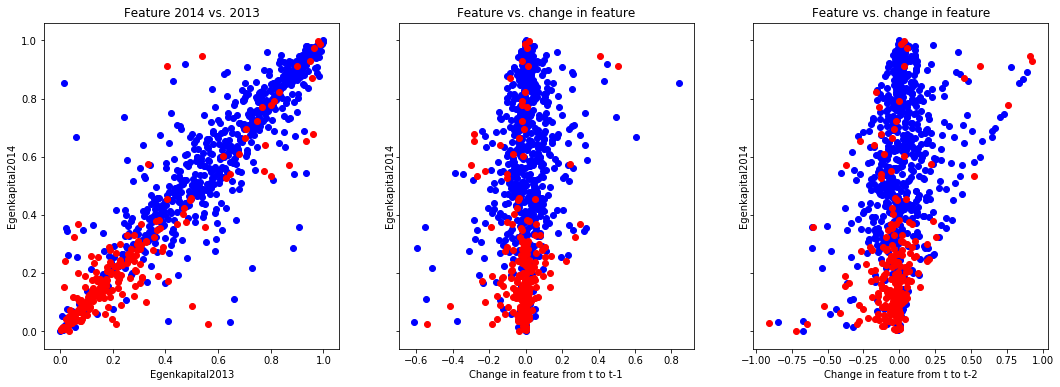

21 22 23
Kortfristet gæld2014


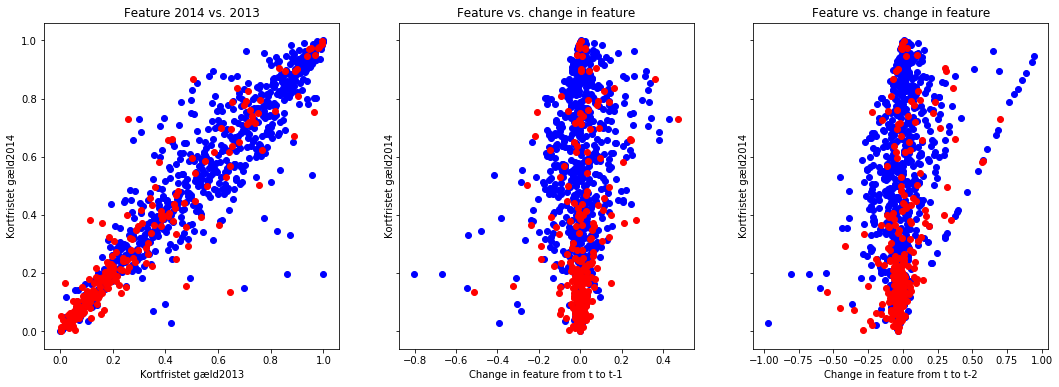

In [0]:
for i in range(0, 24, 3):
  print (i, i+1, i+2)
  get_scatter(i, i+1, i+2)

24 25 26
Afkastningsgrad2014


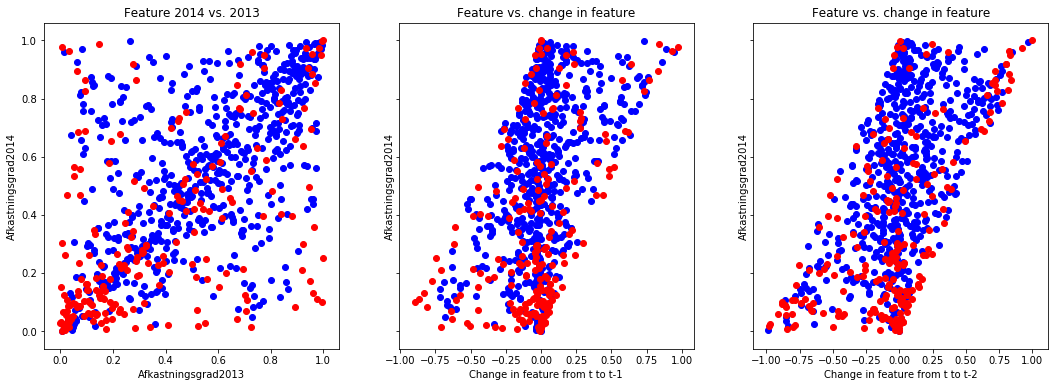

27 28 29
Likviditetsgrad2014


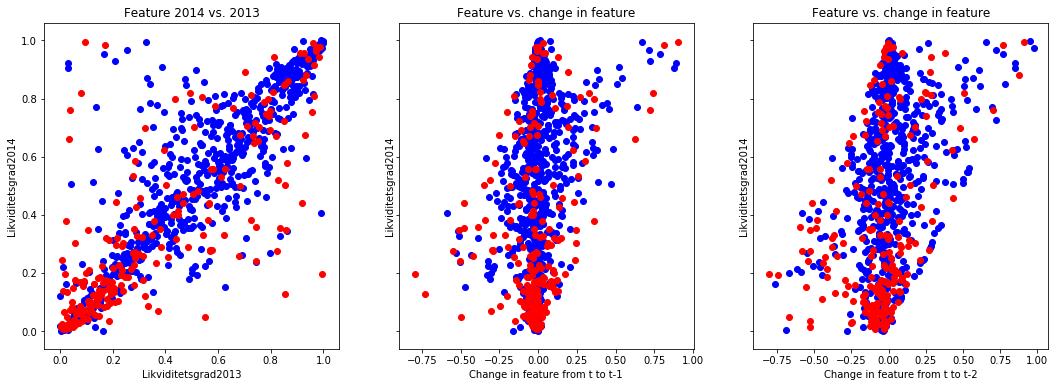

30 31 32
Soliditetsgrad2014


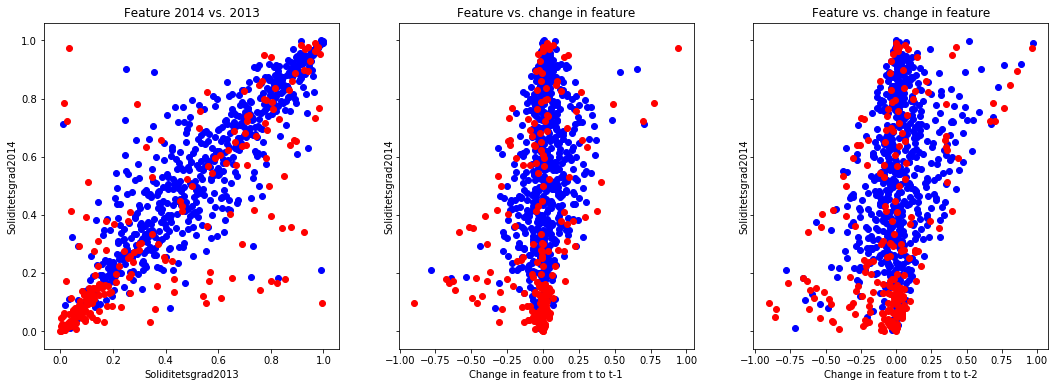

33 34 35
Score afkastningsgrad2014


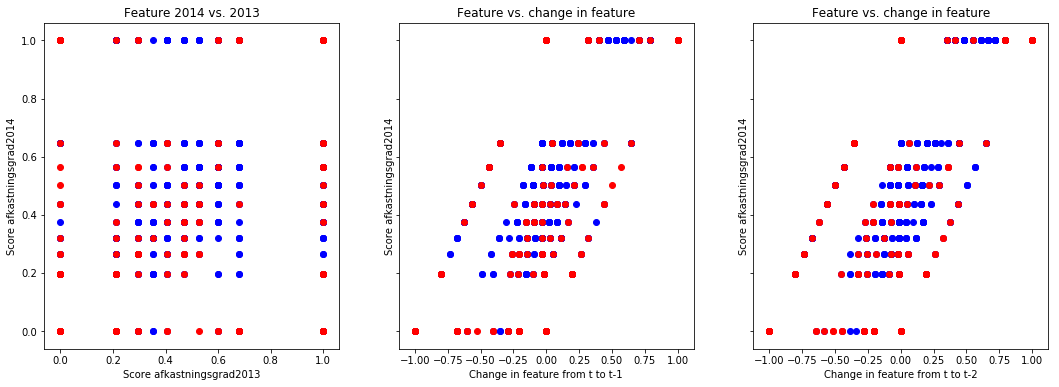

36 37 38
Score soliditetsgrad2014


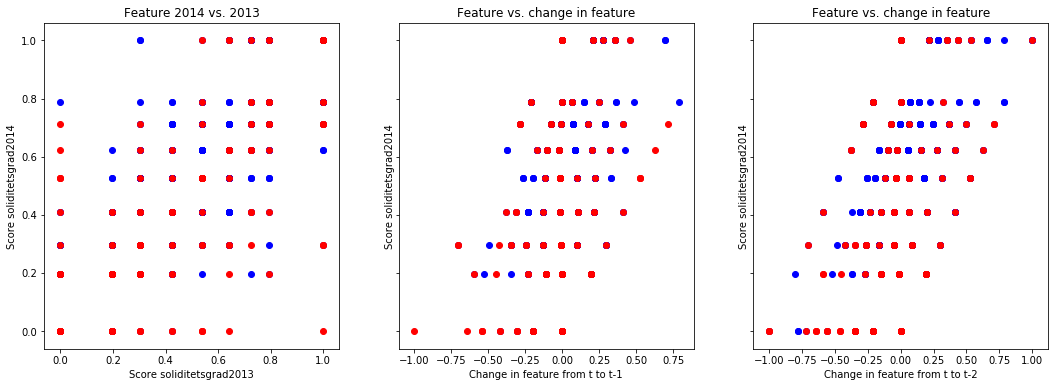

39 40 41
Score likviditetsgrad2014


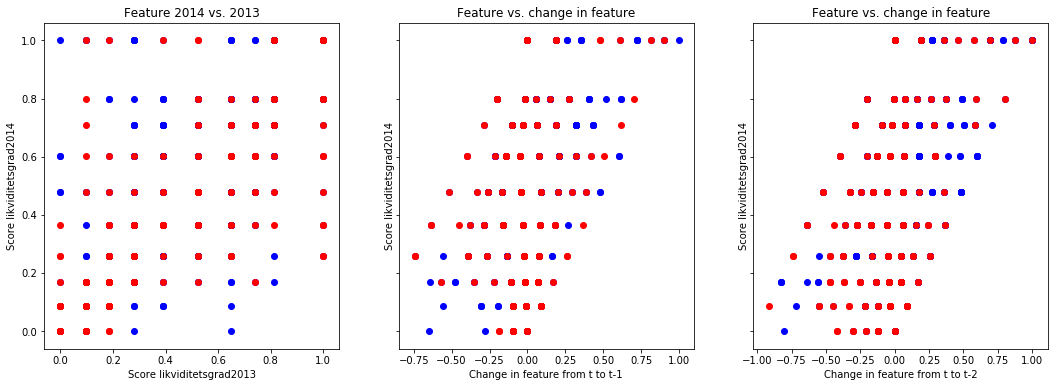

In [0]:
for i in range(24, 42, 3):
  print (i, i+1, i+2)
  get_scatter(i, i+1, i+2)

In [0]:
#Indlæs Pickle-filer
import io
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Med_Branche.pkl to Med_Branche.pkl


In [0]:
uploaded.keys()

dict_keys(['Med_Branche.pkl'])

In [0]:
file = io.BytesIO(uploaded['Med_Branche.pkl'])

In [0]:
emp = pickle.load(file)

In [0]:
emp.shape

(270224, 29)

In [0]:
emp.keys()

Index(['CVR', 'Navn', 'Binavne', 'Status', 'Type', 'Stiftelsesdato', 'Telefon',
       'Email', 'Website', 'Fax', 'Industri', 'Industrikode',
       'Reklamebeskyttet', 'Gadenavn', 'Husnummer', 'Etage', 'Side', 'By',
       'Kommune', 'Postnummer', 'Land', 'Kontaktperson', 'Kontaktperson Rolle',
       'Kontaktperson tiltrædelsesdato', 'Medarbejdere', 'Børsnoteret',
       'Antal reelle ejere', 'Antal legale ejere', 'Formål'],
      dtype='object')